<a href="https://colab.research.google.com/github/xeeshan-dev/-AI-Capstone-Project/blob/main/spam_email_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: connect to drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam


In [8]:

# Load the dataset
file_path = '/content/drive/MyDrive/spam email/dataset spam/dataset.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Clean the dataset
data_cleaned = data[['v1', 'v2']]
data_cleaned.columns = ['label', 'message']

In [9]:
# Step 2: Text Preprocessing
# Function to clean the text (remove non-alphabetic characters, convert to lowercase, etc.)
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Using .loc to avoid SettingWithCopyWarning
data_cleaned.loc[:, 'message'] = data_cleaned['message'].apply(clean_text)


In [10]:
# Display the first few rows after preprocessing
data_cleaned.head()


,label,message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


In [11]:
# Step 3: Splitting the dataset into training and testing sets
X = data_cleaned['message']
y = data_cleaned['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
# Step 4: Tokenization and Padding
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding the sequences to ensure consistent input size
max_sequence_length = 100  # Set to desired sequence length
X_train_seq = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_seq = pad_sequences(X_test_seq, maxlen=max_sequence_length)


In [13]:
# Step 5: Building the Neural Network Model
model = Sequential()

# Adding embedding layer to map words to vectors
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_sequence_length))

# Flatten the output
model.add(Flatten())

# Adding a Dense layer
model.add(Dense(128, activation='relu'))

# Dropout to prevent overfitting
model.add(Dropout(0.5))

# Output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [15]:
# Step 6: Training the Model
# Convert string labels to numerical representation
y_train = pd.get_dummies(y_train, drop_first=True)['spam'].astype(int)  # 'ham' will be 0, 'spam' will be 1
y_test = pd.get_dummies(y_test, drop_first=True)['spam'].astype(int)  # 'ham' will be 0, 'spam' will be 1

history = model.fit(X_train_seq, y_train, epochs=5, batch_size=32, validation_data=(X_test_seq, y_test))

Epoch 1/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.8681 - loss: 0.3090 - val_accuracy: 0.9797 - val_loss: 0.0873
Epoch 2/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9896 - loss: 0.0511 - val_accuracy: 0.9821 - val_loss: 0.0865
Epoch 3/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9955 - loss: 0.0201 - val_accuracy: 0.9844 - val_loss: 0.0790
Epoch 4/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9991 - loss: 0.0077 - val_accuracy: 0.9844 - val_loss: 0.0807
Epoch 5/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9995 - loss: 0.0043 - val_accuracy: 0.9862 - val_loss: 0.0808


In [16]:
# Step 7: Evaluating the Model
loss, accuracy = model.evaluate(X_test_seq, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9882 - loss: 0.0735
Test Accuracy: 0.9862
Test Loss: 0.0808


In [17]:
# Step 7: Evaluating the Model
loss, accuracy = model.evaluate(X_test_seq, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9882 - loss: 0.0735
Test Accuracy: 0.9862
Test Loss: 0.0808


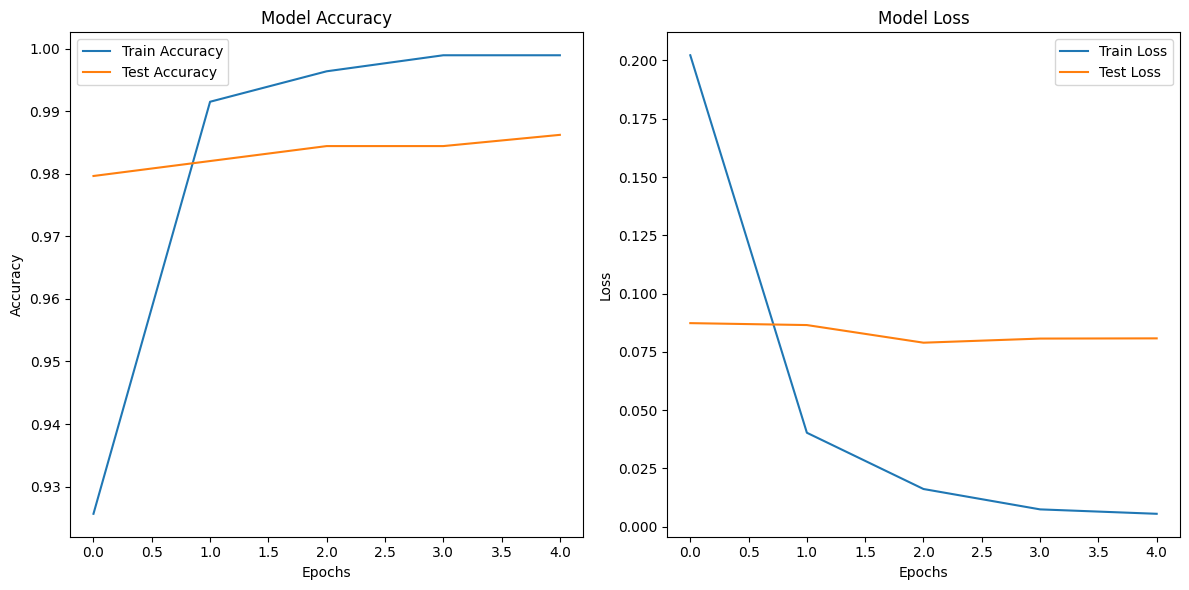

In [18]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


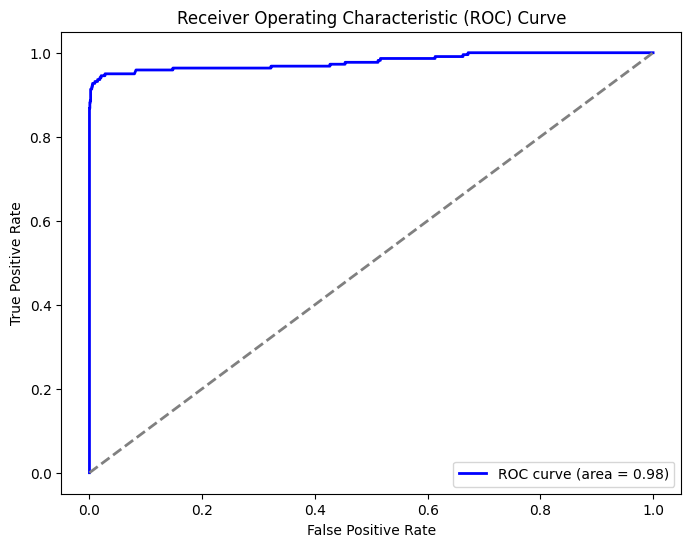

In [19]:
# Step 9: ROC Curve
y_pred_prob = model.predict(X_test_seq)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [22]:
# Step 10: Making Predictions
new_texts = ["Dear Zishan Sher We are pleased to inform you that the Internship Recruitment Drive is scheduled to be held on Wednesday, 7th May 2025 at 10:00 AM. The session will be conducted online. You are requested to join the session promptly at the scheduled time using the link provided below: https://cottonweb.zoom.us/j/89866512189?pwd=kt3uBXs4JxLnpUEBWdheigN3QyQXE.1 This session is a valuable opportunity to learn about available internship roles, understand the selection process, and interact with the recruitment team. Your participation is important for further consideration in the internship selection process. If you have any questions or concerns, feel free to reach out. Regards,Rameen Maqsood | HR Generalist | Human Resource"]

# Preprocess the new texts (same as training data)
new_texts_seq = tokenizer.texts_to_sequences(new_texts)
new_texts_seq = pad_sequences(new_texts_seq, maxlen=max_sequence_length)

# Predicting using the trained model
predictions = model.predict(new_texts_seq)

# Output the predictions
for text, pred in zip(new_texts, predictions):
    print(f"Text: {text}\nPrediction: {'Spam' if pred > 0.5 else 'Ham'}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Text: Dear Zishan Sher We are pleased to inform you that the Internship Recruitment Drive is scheduled to be held on Wednesday, 7th May 2025 at 10:00 AM. The session will be conducted online. You are requested to join the session promptly at the scheduled time using the link provided below: https://cottonweb.zoom.us/j/89866512189?pwd=kt3uBXs4JxLnpUEBWdheigN3QyQXE.1 This session is a valuable opportunity to learn about available internship roles, understand the selection process, and interact with the recruitment team. Your participation is important for further consideration in the internship selection process. If you have any questions or concerns, feel free to reach out. Regards,Rameen Maqsood | HR Generalist | Human Resource
Prediction: Spam

